<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

- Whether the person donated blood
- What kind of classification problem do they have?


## Actual Question
Choose the **one** question that should be answered.

- What kind of classification problem do they have?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn import decomposition

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

from sklearn.utils import resample

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
# Read data in pandas
csv = '../DATA/transfusion.csv'
df = pd.read_csv(csv)
# Check data has loaded correctly
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
# Perform EDA by investigating each of the points above 

In [4]:
print(f'Number of features {df.shape[1]}')

Number of features 5


In [5]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [6]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [7]:
for column in df.columns:
    print(f'{column}')
    print(f'Min: {df[column].min()}  Max:   {df[column].max()} ')
    print('Unique Values:')
    print(df[column].unique())
    print(' ')

Recency (months)
Min: 0  Max:   74 
Unique Values:
[ 2  0  1  4  5  9  3 12  6 11 10 13  8 14  7 16 15 23 21 18 22 26 35 38
 40 74 20 17 25 39 72]
 
Frequency (times)
Min: 1  Max:   50 
Unique Values:
[50 13 16 20 24  4  7 12  9 46 23  3 10  6  5 14 15 11  8  2 19 17  1 22
 18 38 43 34 44 26 41 21 33]
 
Monetary (c.c. blood)
Min: 250  Max:   12500 
Unique Values:
[12500  3250  4000  5000  6000  1000  1750  3000  2250 11500  5750   750
  2500  1500  1250  3500  3750  2750  2000   500  4750  4250   250  5500
  4500  9500 10750  8500 11000  6500 10250  5250  8250]
 
Time (months)
Min: 2  Max:   98 
Unique Values:
[98 28 35 45 77  4 14 22 58 47 15 11 48 49 16 40 34 21 26 64 57 53 69 36
  2 46 52 81 29  9 74 25 51 71 23 86 38 76 70 59 82 61 79 41 33 10 95 88
 19 37 39 78 42 27 24 63 43 75 73 50 60 17 72 62 30 31 65 89 87 93 83 32
 12 18 55  3 13 54]
 
whether he/she donated blood in March 2007
Min: 0  Max:   1 
Unique Values:
[1 0]
 


In [8]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


C:\Users\darry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\darry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\darry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

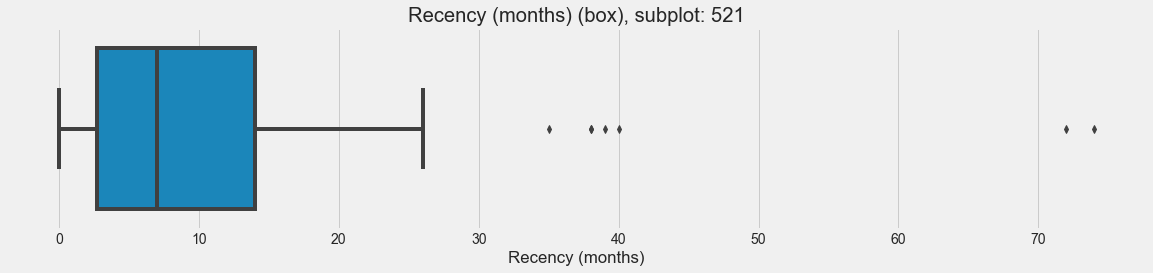

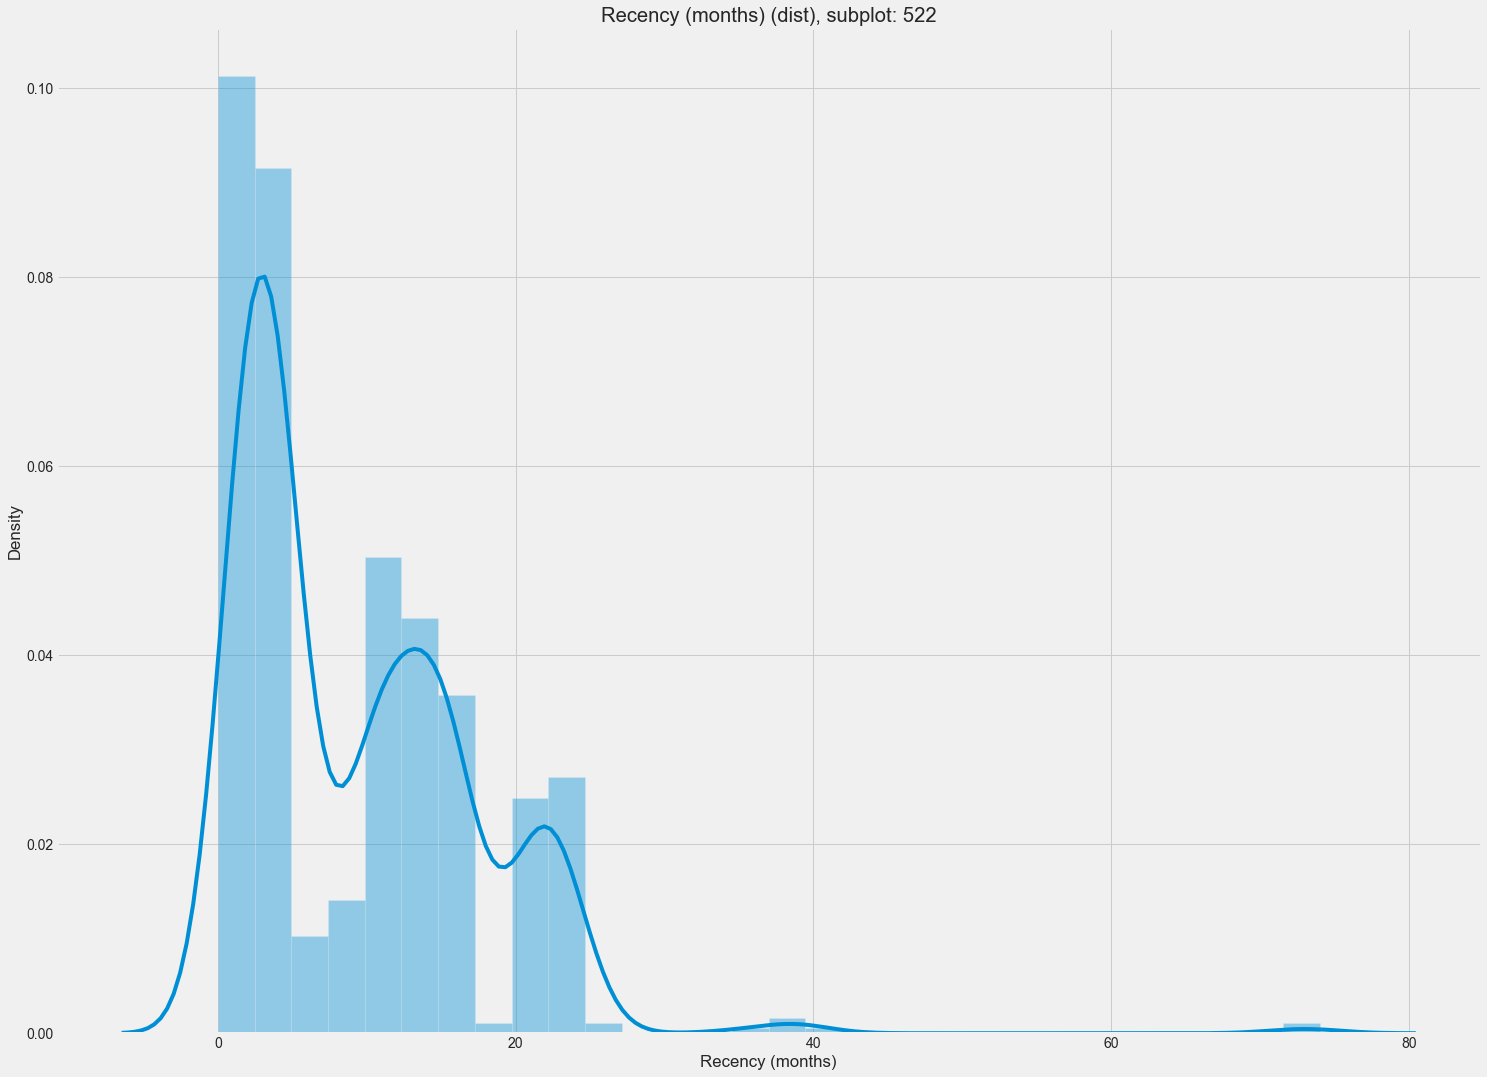

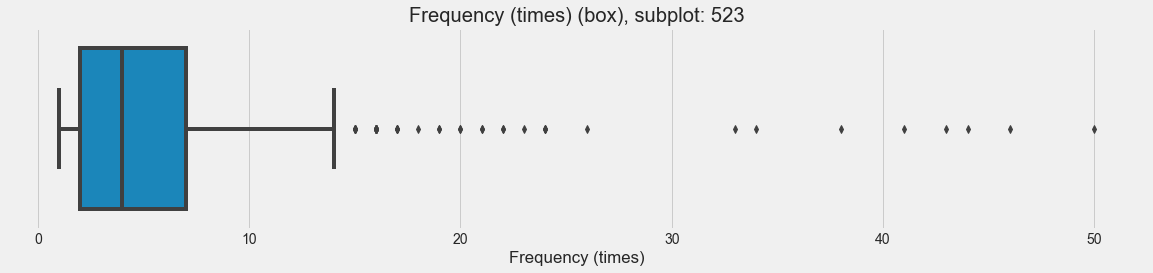

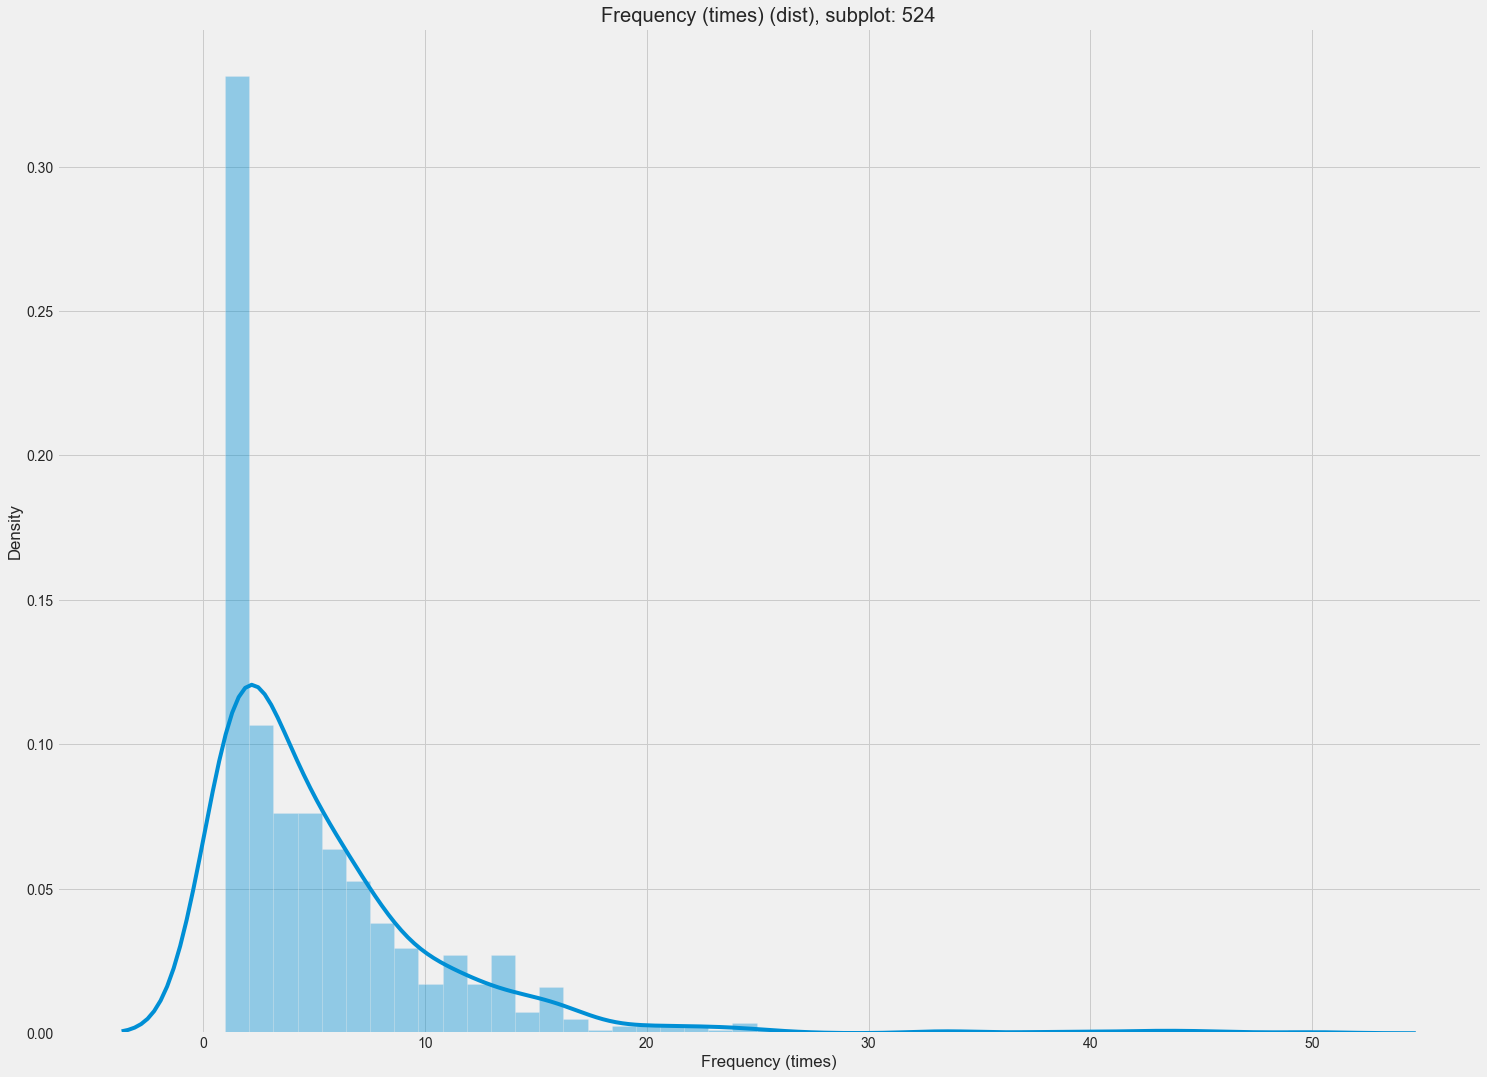

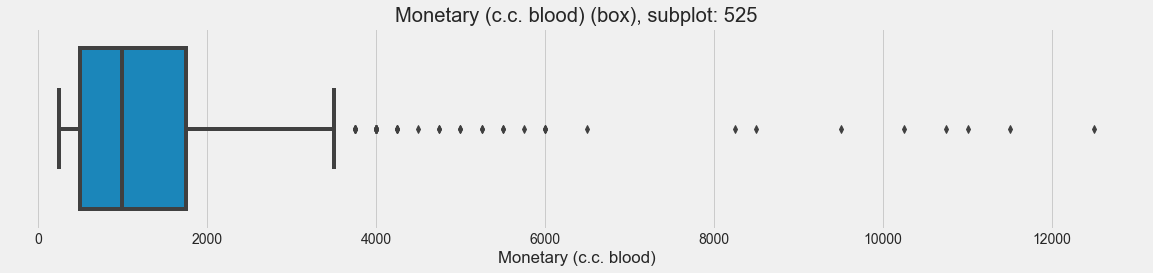

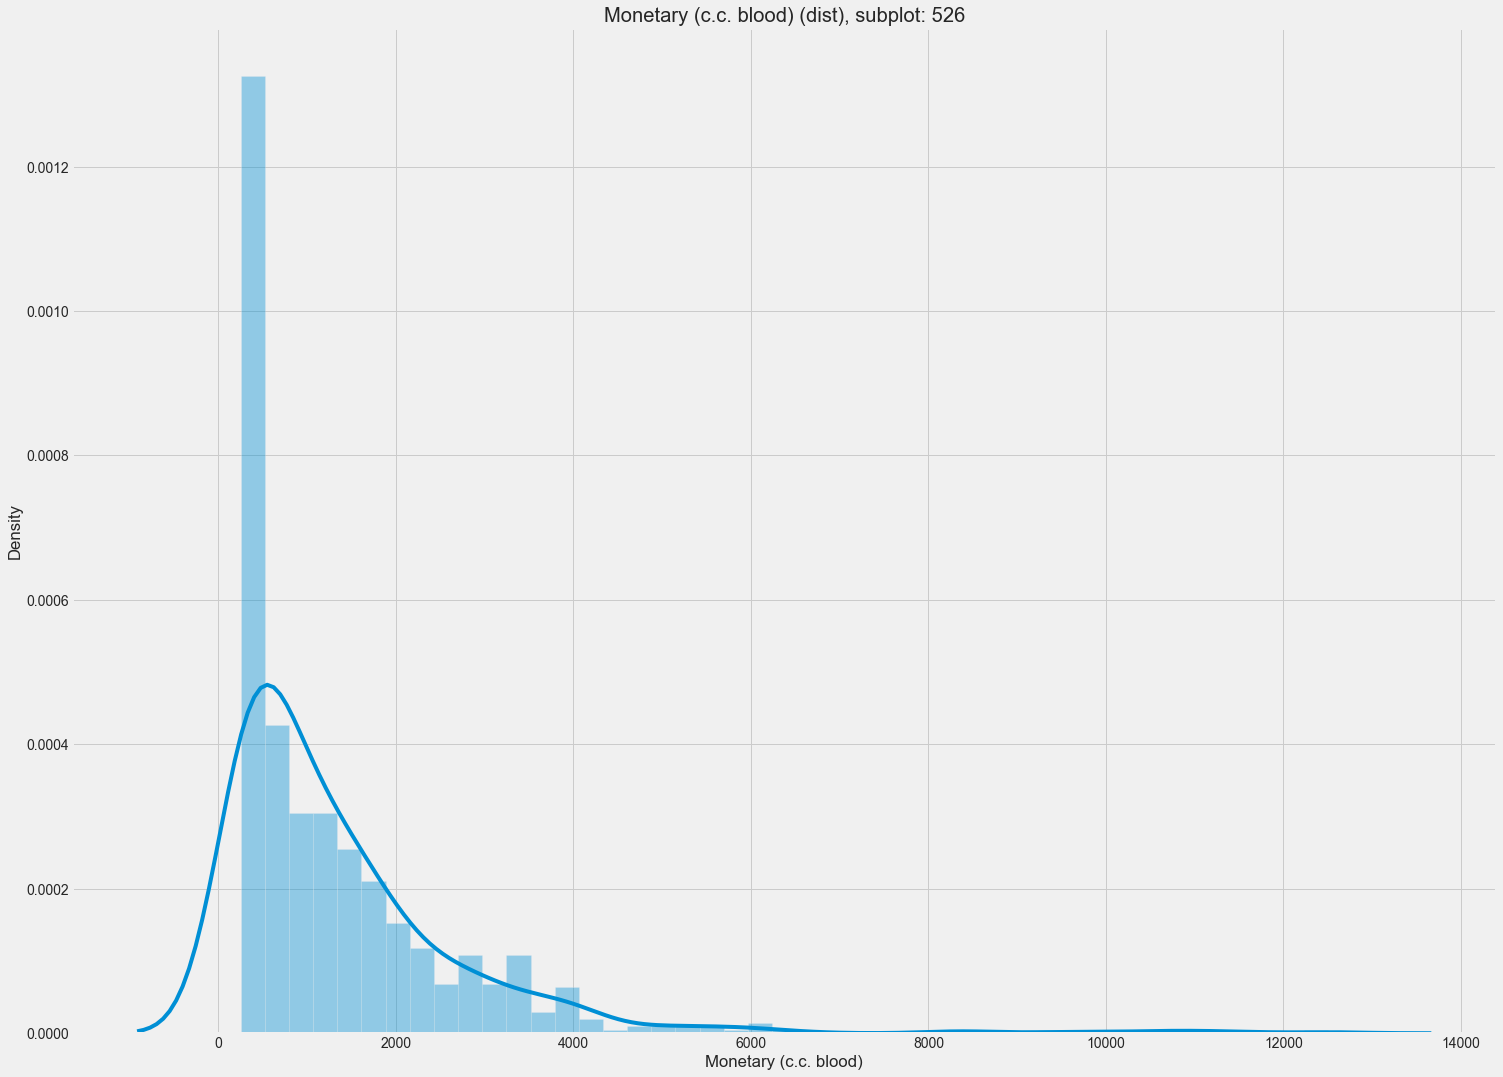

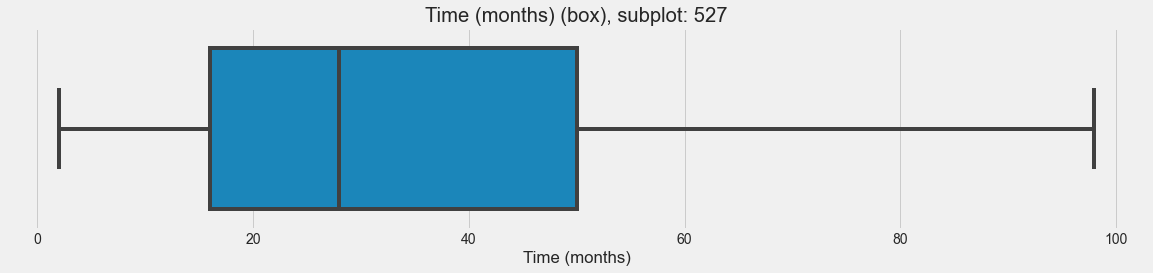

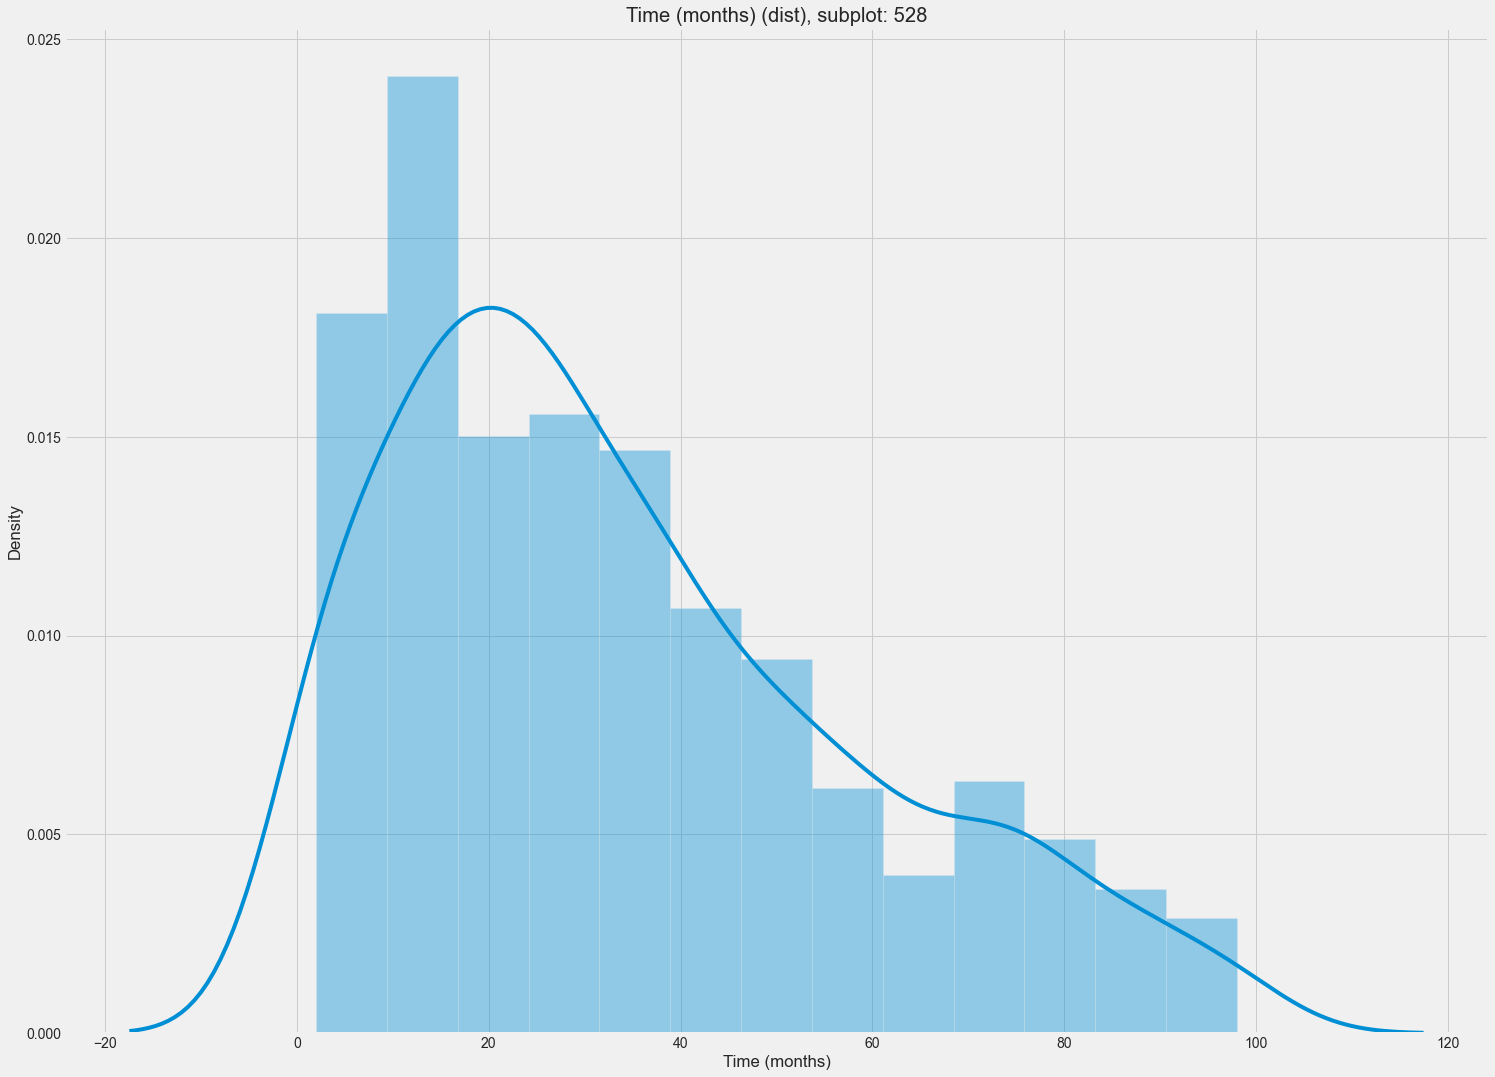

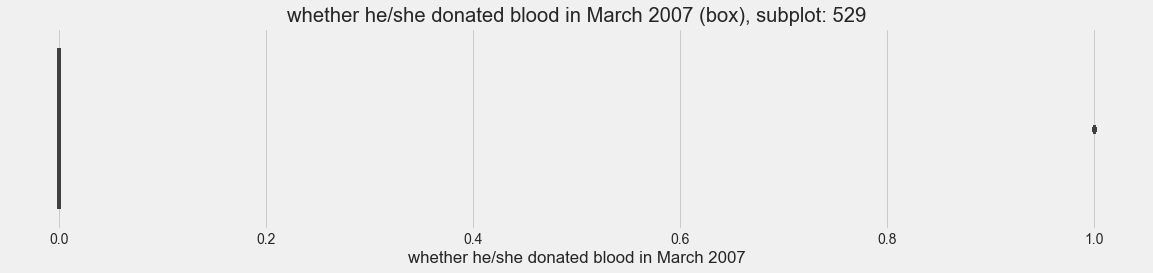

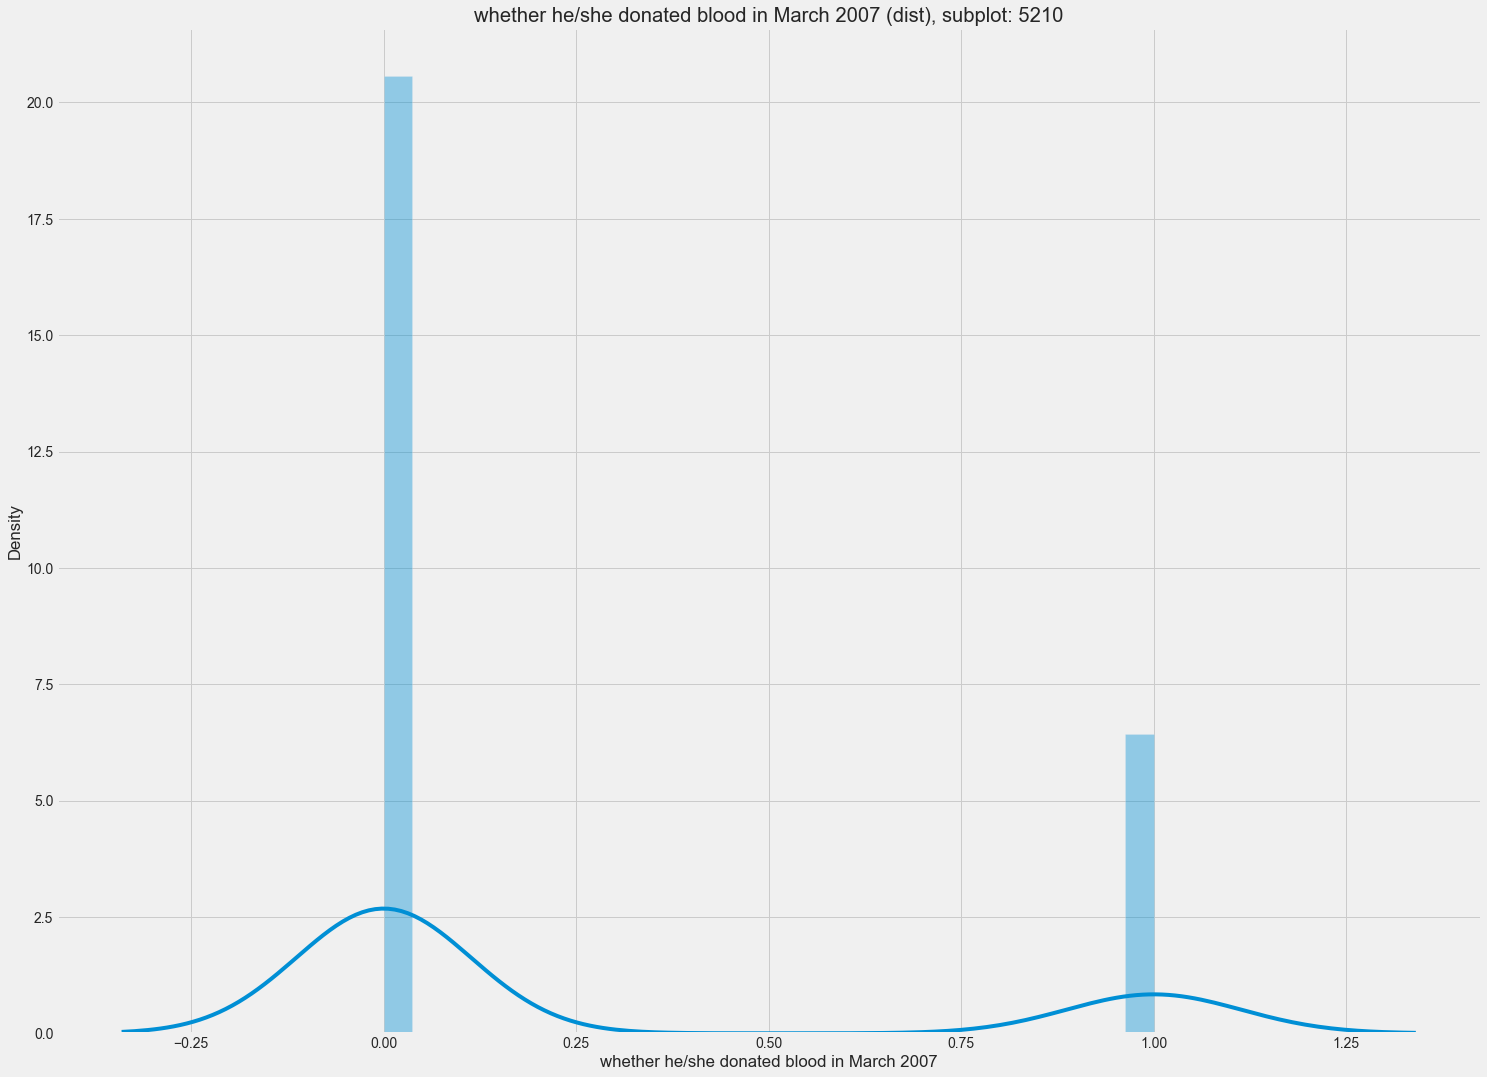

In [9]:
a = 5
b = 2
c = 1

for i in df.columns:
    
    plt.figure(figsize = (40,20))
    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    sns.boxplot(x = df[i])
    c = c + 1
    
    plt.figure(figsize = (50,100))
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    sns.distplot(df[i])
    c = c + 1   
    
    
    
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [10]:
# Filter/subset/clean the data according to your EDA findings

In [11]:
# Replace zero by mean
recency_months_mean = df['Recency (months)'].mean()
recency_months_mean = np.round(recency_months_mean)
df['Recency (months)'] = df['Recency (months)'].replace(0, recency_months_mean)

### Removing Outliers for Frequency (times)

In [12]:
Q1 = df['Frequency (times)'].quantile(0.25)
Q3 = df['Frequency (times)'].quantile(0.75)


IQR = Q3 - Q1

print('Old Shape: ', df.shape)

# Upper bound
upper = np.where(df['Frequency (times)'] >= (Q3 + 1.5*IQR)) 

# lower bound
lower = np.where(df['Frequency (times)'] <= (Q1 - 1.5*IQR))

# Removing the Outliers

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print('New Shape: ', df.shape)

Old Shape:  (748, 5)
New Shape:  (703, 5)


In [13]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

C:\Users\darry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\darry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\darry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

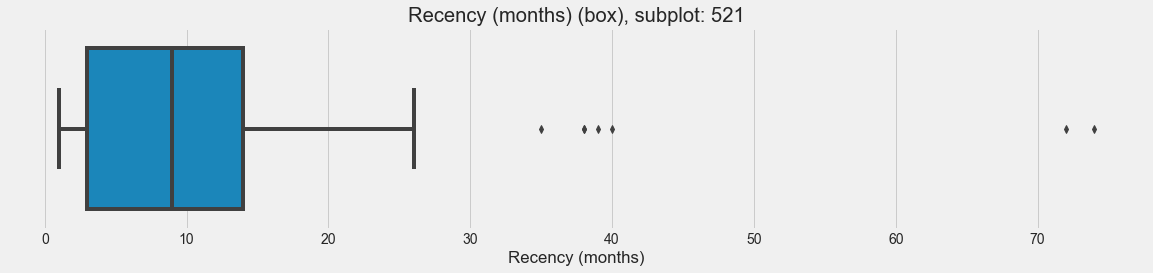

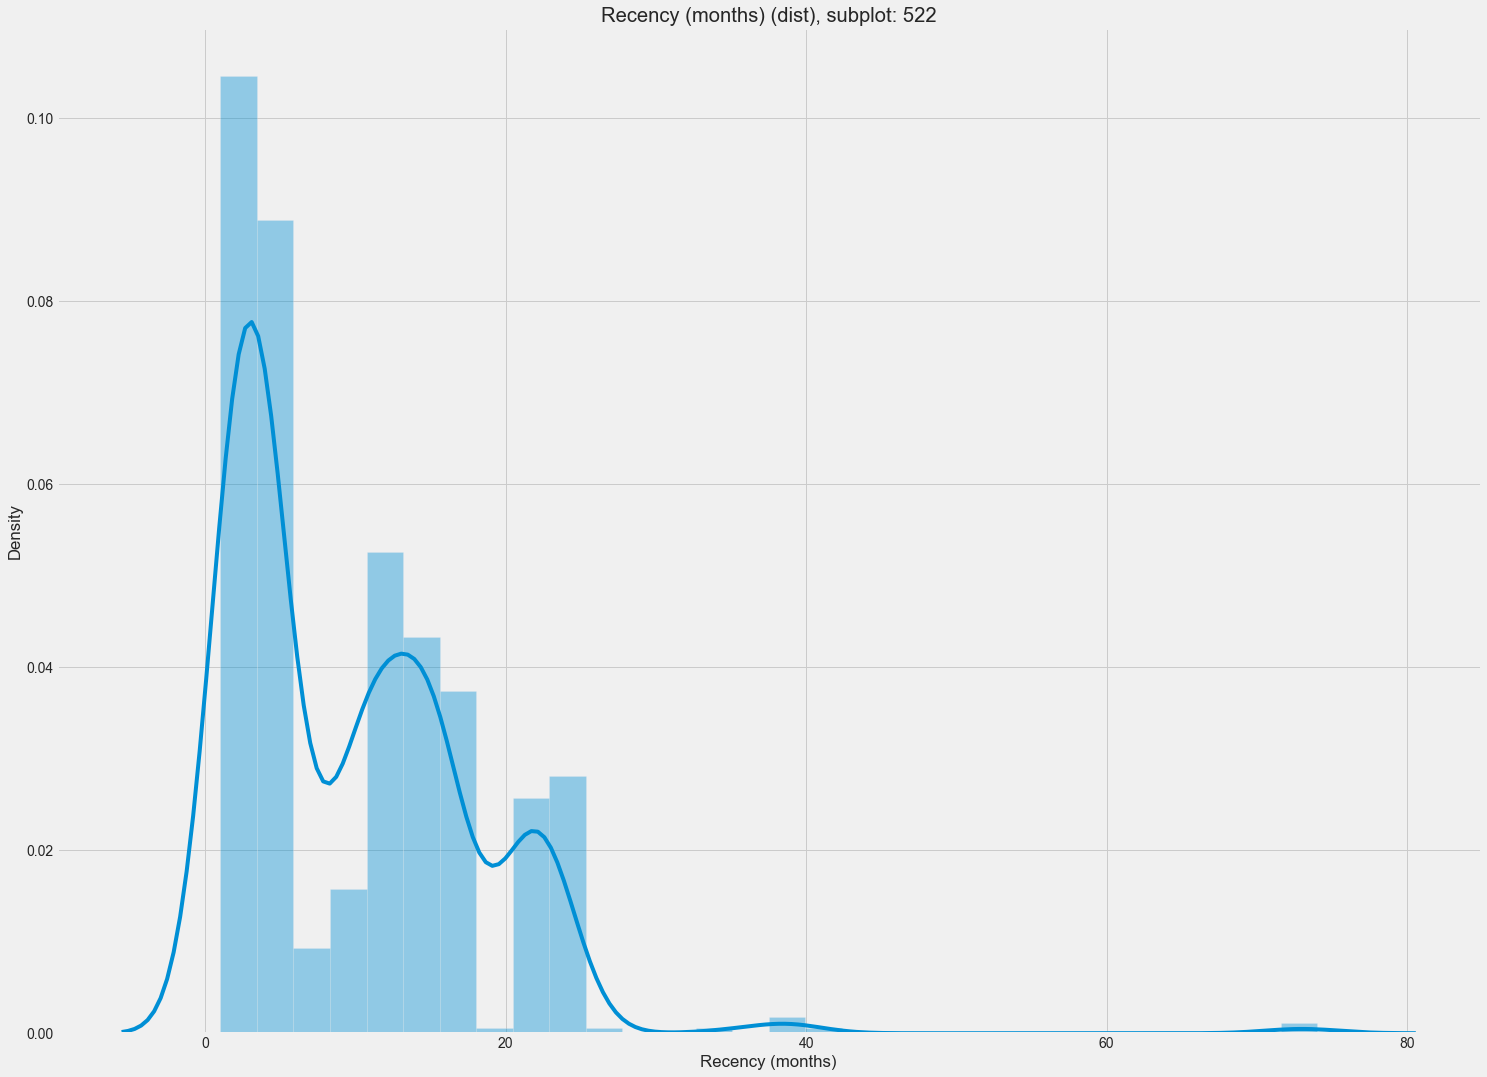

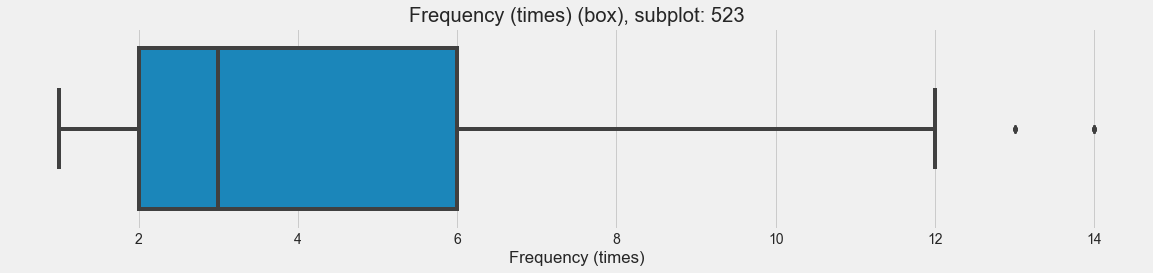

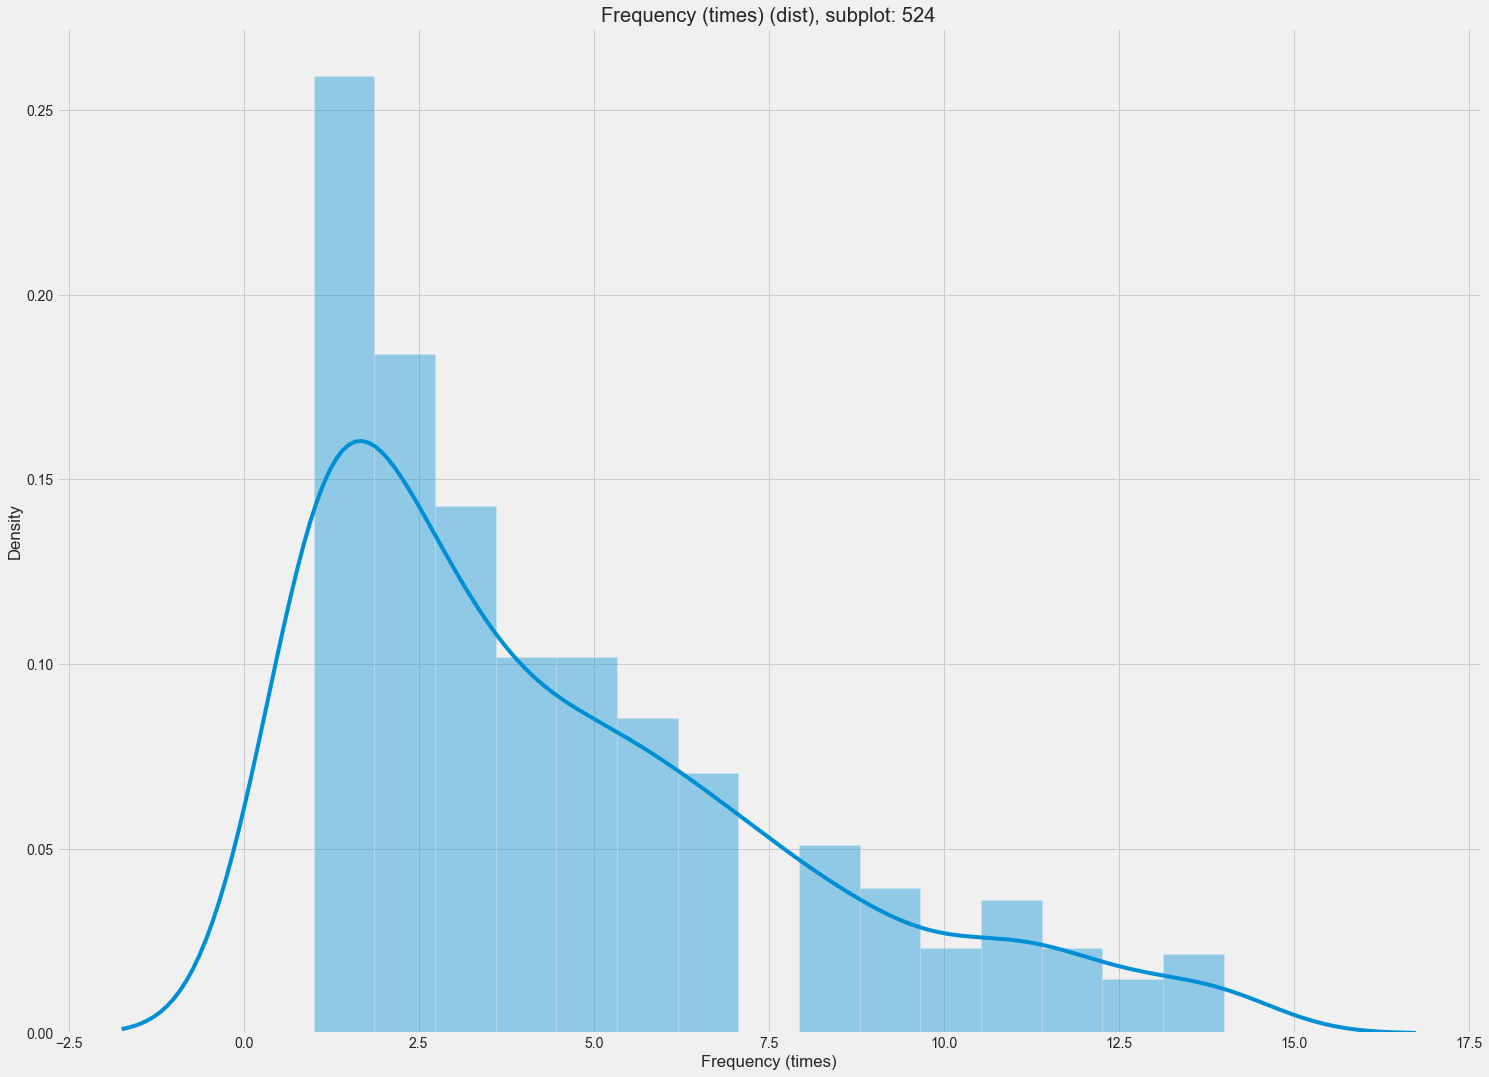

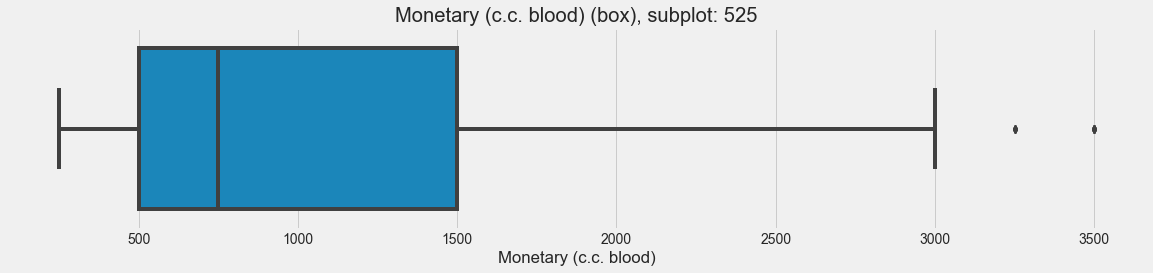

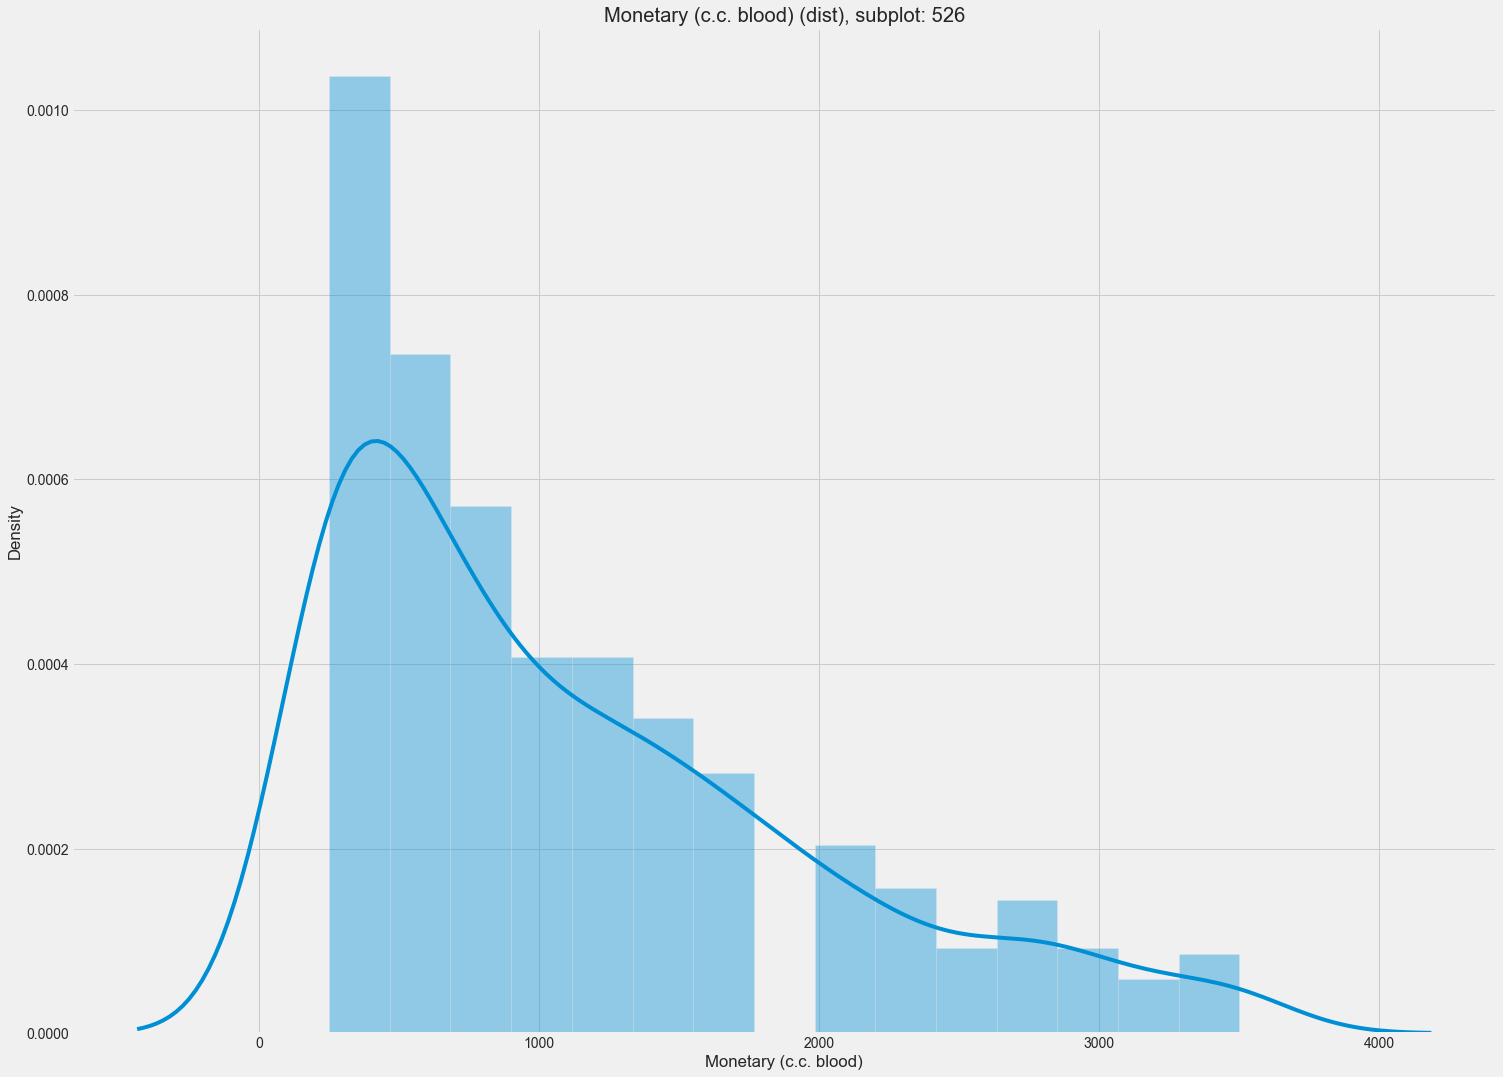

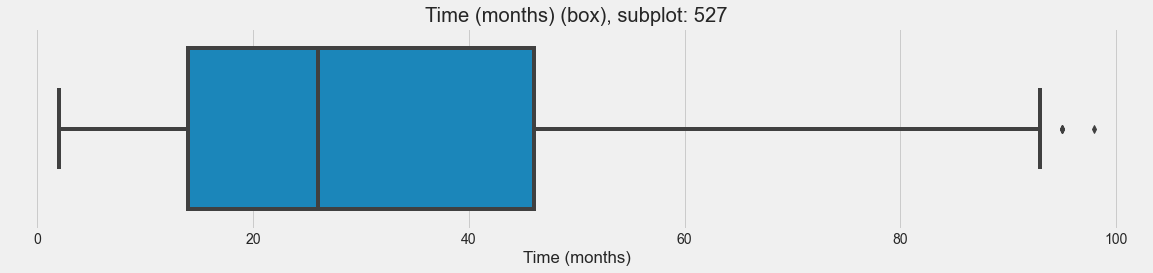

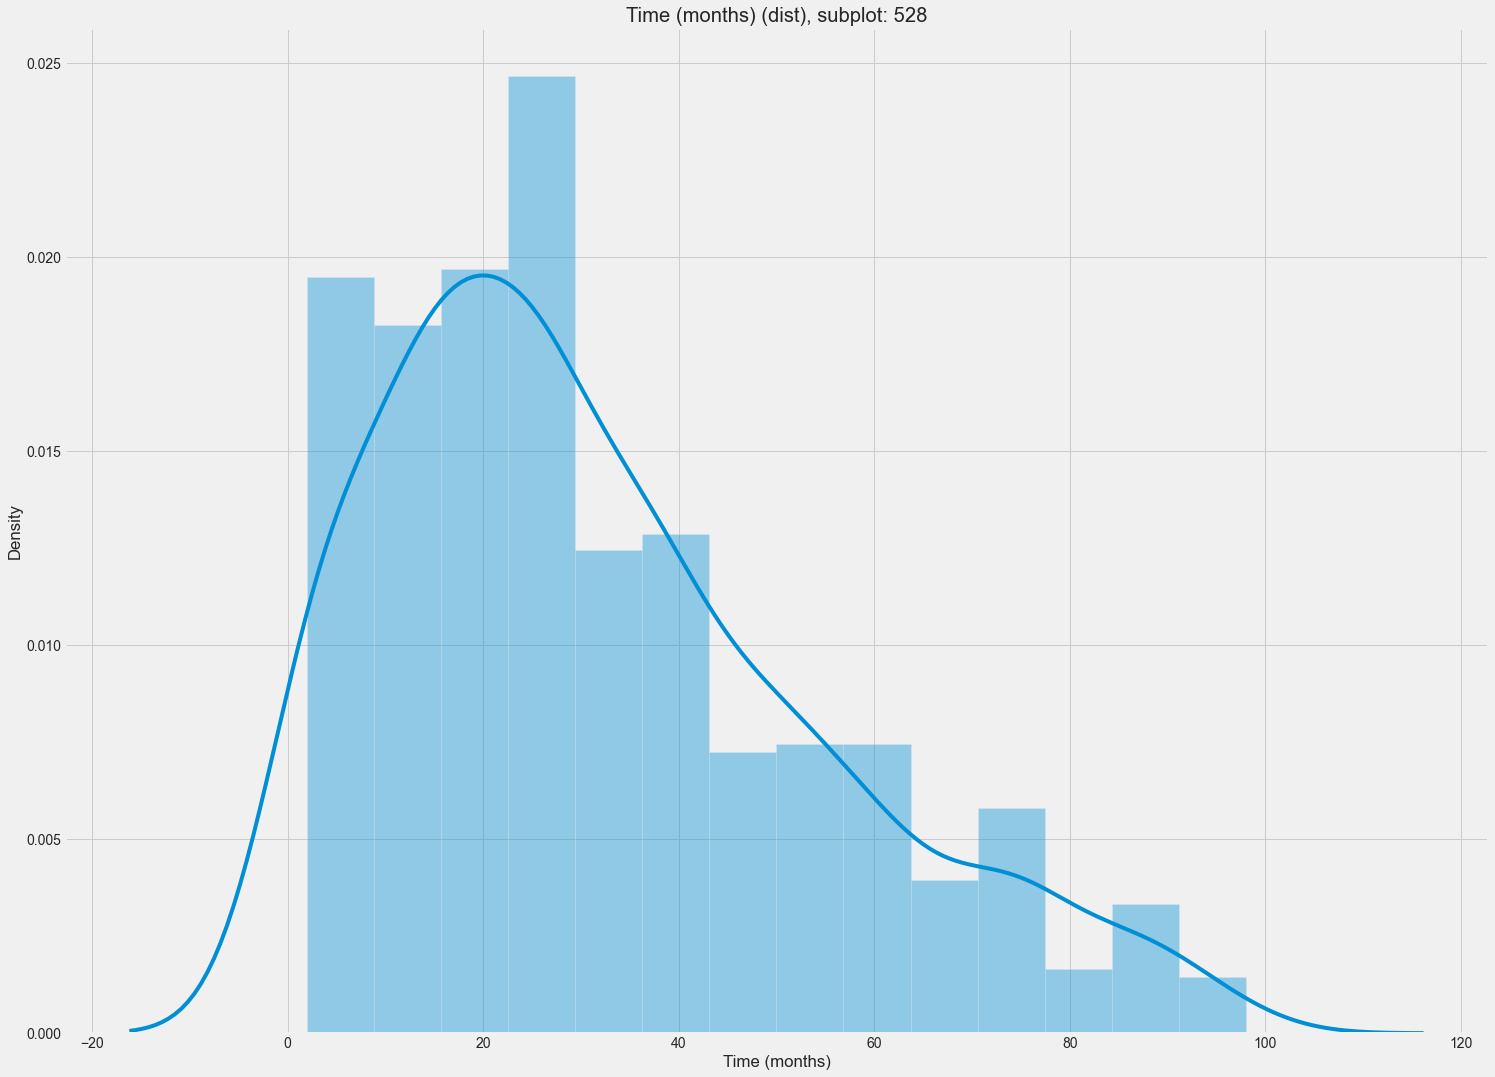

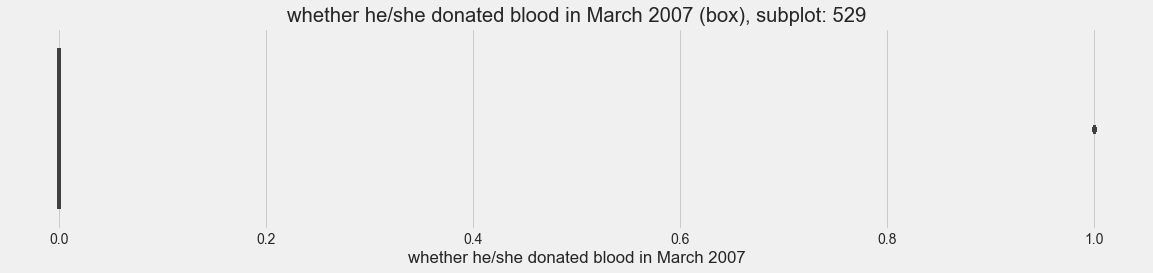

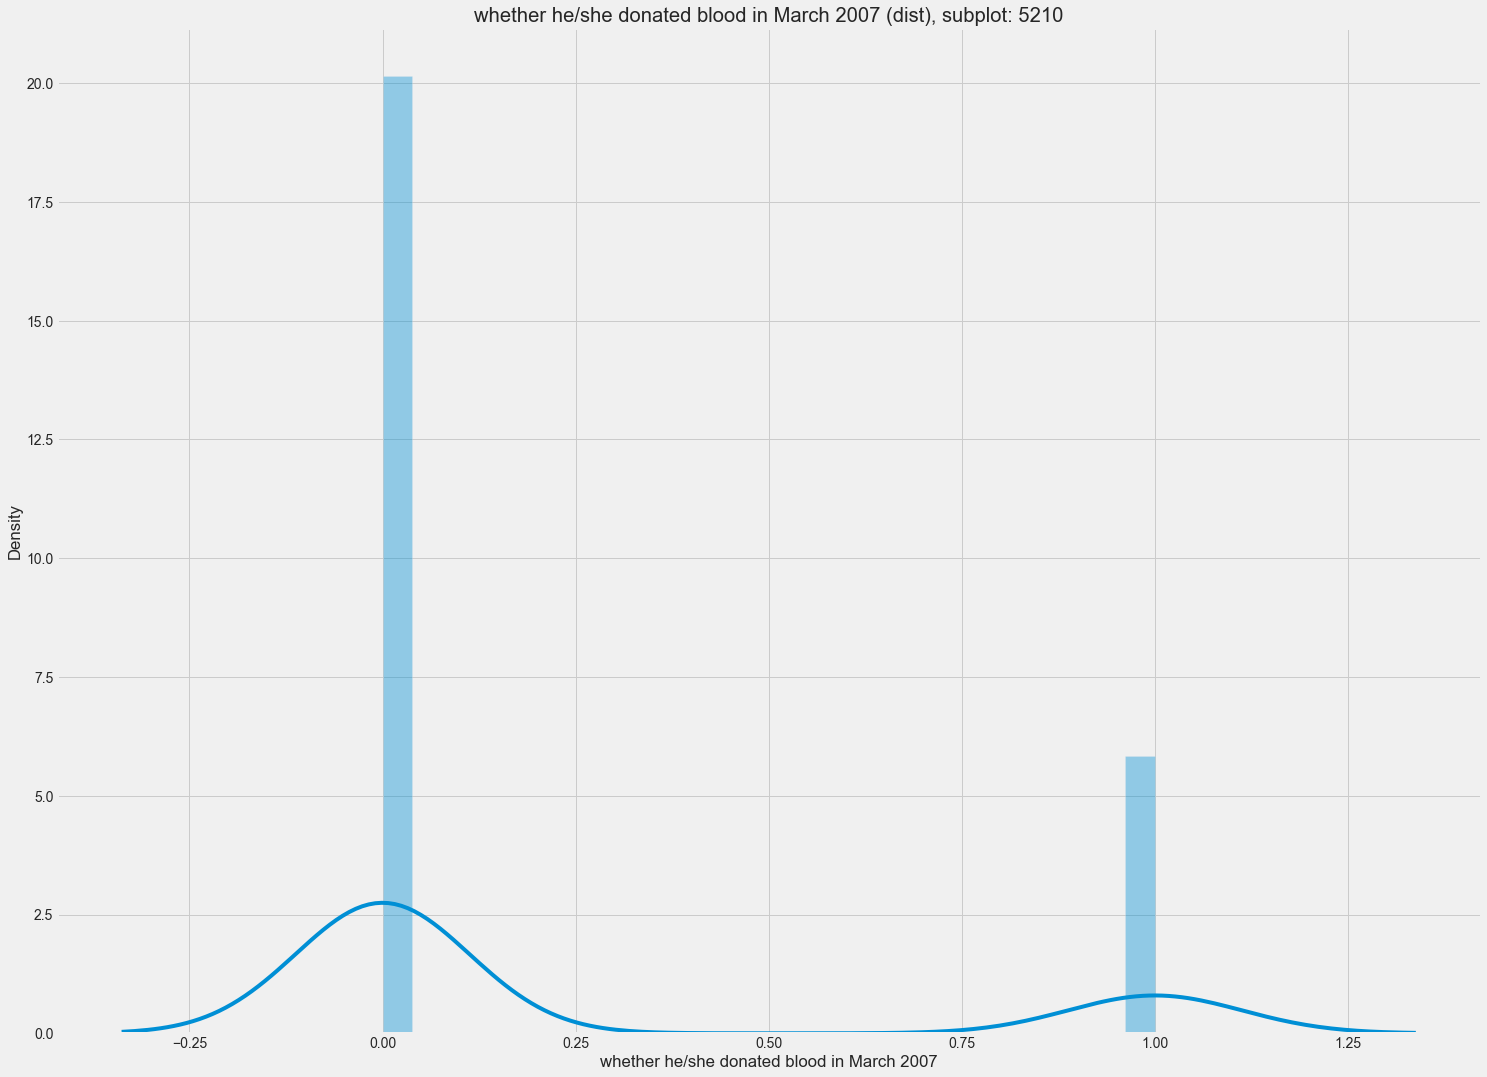

In [14]:
a = 5
b = 2
c = 1

for i in df.columns:
    
    plt.figure(figsize = (40,20))
    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    sns.boxplot(x = df[i])
    c = c + 1
    
    plt.figure(figsize = (50,100))
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    sns.distplot(df[i])
    c = c + 1   
    
    
    
plt.show()

In [15]:
# Defining Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier()

target = 'whether he/she donated blood in March 2007'
X = df.drop(target, axis=1)
y = df[target]

In [16]:
# Defining Feature Selection

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
rfc_sfs = sfs(rfc_clf, k_features = 3, forward = True, verbose = 2, scoring = 'neg_mean_squared_error')
rfc_sfs.fit(X, y)
features_names = list(rfc_sfs.k_feature_names_)
features_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.4s finished

[2022-02-23 10:14:40] Features: 1/3 -- score: -0.22616008105369806[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.7s finished

[2022-02-23 10:14:45] Features: 2/3 -- score: -0.22757852077001015[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s finished

[2022-02-23 10:14:49] Features: 3/3 -- score: -0.2844376899696049

['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)']

In [17]:
X = df[features_names]
y = df[target]

In [18]:
y.dtypes

dtype('int64')

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [19]:
print('- What are the input variables (features)?')
print(f'  - %s' % ', '.join(features_names))
print('- Is there an output variable (label)?')
print(' - %s' % ('yes' if target else 'No'))
print(' - %s' % target)
print(' - %s' % y.dtypes)
print('- What type of Modelling is it?')
print(' - [%s] Supervised' % ('x' if target else ' '))
print(' - [%s] Unsupervised' % (' ' if target else 'x'))
print('- What type of modelling is it?')
print(' - [%s] Regression' % ('x' if y.dtypes == 'object' else ' '))
print(' - [%s] Classification (binary)' % ('x' if (y.dtype != 'object') and (len(y.unique()) == 2) else ' '))
print(' - [%s] Classification (multi-class)' % ('x' if(y.dtype == 'object') and (len(y.unique()) != 2) else ' '))
print(' - [%s] Clustering' % (' ' if target else 'x'))

- What are the input variables (features)?
  - Recency (months), Frequency (times), Monetary (c.c. blood)
- Is there an output variable (label)?
 - yes
 - whether he/she donated blood in March 2007
 - int64
- What type of Modelling is it?
 - [x] Supervised
 - [ ] Unsupervised
- What type of modelling is it?
 - [ ] Regression
 - [x] Classification (binary)
 - [ ] Classification (multi-class)
 - [ ] Clustering


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [20]:
# Split your data
test_size = X.shape[0] - 500
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y)

print(Counter(y_train))
print(Counter(y_test))

Counter({0: 272, 1: 79})
Counter({0: 273, 1: 79})


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [21]:
# Choose a model or models

rfc_clf = RandomForestClassifier(n_estimators = 1000, min_weight_fraction_leaf = 0.2, class_weight = 'balanced')

# Step 9: Fit the Model

In [22]:
# Fit model
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_weight_fraction_leaf=0.2,
                       n_estimators=1000)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [23]:
def evaluate(model, X_train, X_test, y_train, y_test):
    
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print('TRAINING RESULTS: \n==========================================')
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    print(f'CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}')
    print(f'ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred)}')
    print(f'CLASSIFICATION REPORT:\n{clf_report}')
    
    print('TESTING RESULTS: \n==========================================')
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
    print(f'CONFUSION MATRIX: \n{confusion_matrix(y_test, y_test_pred)}')
    print(f'ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}')
    print(f'CLASSIFICATION REPORT:\n{clf_report}')

In [24]:
# Evaluate model against training set
evaluate(rfc_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[201  71]
 [ 36  43]]
ACCURACY SCORE:
0.6951566951566952
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.848101   0.377193  0.695157    0.612647      0.742113
recall       0.738971   0.544304  0.695157    0.641637      0.695157
f1-score     0.789784   0.445596  0.695157    0.617690      0.712317
support    272.000000  79.000000  0.695157  351.000000    351.000000
TESTING RESULTS: 
CONFUSION MATRIX: 
[[202  71]
 [ 30  49]]
ACCURACY SCORE:
0.7131
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870690   0.408333  0.713068    0.639511      0.766922
recall       0.739927   0.620253  0.713068    0.680090      0.713068
f1-score     0.800000   0.492462  0.713068    0.646231      0.730979
support    273.000000  79.000000  0.713068  352.000000    352.000000


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [25]:
# Evaluate model against test set

evaluate(rfc_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[201  71]
 [ 36  43]]
ACCURACY SCORE:
0.6951566951566952
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.848101   0.377193  0.695157    0.612647      0.742113
recall       0.738971   0.544304  0.695157    0.641637      0.695157
f1-score     0.789784   0.445596  0.695157    0.617690      0.712317
support    272.000000  79.000000  0.695157  351.000000    351.000000
TESTING RESULTS: 
CONFUSION MATRIX: 
[[202  71]
 [ 30  49]]
ACCURACY SCORE:
0.7131
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870690   0.408333  0.713068    0.639511      0.766922
recall       0.739927   0.620253  0.713068    0.680090      0.713068
f1-score     0.800000   0.492462  0.713068    0.646231      0.730979
support    273.000000  79.000000  0.713068  352.000000    352.000000


# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [26]:
sm = SMOTE(sampling_strategy = 'minority')

X_sm, y_sm = sm.fit_resample(X_train, y_train)

rfc_clf.fit(X_sm, y_sm)

evaluate(rfc_clf, X_sm, X_test, y_sm, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[207  65]
 [113 159]]
ACCURACY SCORE:
0.6727941176470589
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.646875    0.709821  0.672794    0.678348      0.678348
recall       0.761029    0.584559  0.672794    0.672794      0.672794
f1-score     0.699324    0.641129  0.672794    0.670227      0.670227
support    272.000000  272.000000  0.672794  544.000000    544.000000
TESTING RESULTS: 
CONFUSION MATRIX: 
[[214  59]
 [ 33  46]]
ACCURACY SCORE:
0.7386
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.866397   0.438095  0.738636    0.652246      0.770272
recall       0.783883   0.582278  0.738636    0.683081      0.738636
f1-score     0.823077   0.500000  0.738636    0.661538      0.750568
support    273.000000  79.000000  0.738636  352.000000    352.000000


>

>

>



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



